In [1]:
import json
import pandas as pd
import seaborn as sns

In [8]:
# List of experiments, with k, chunk type, chunk size.
list_exps = [
(2, 'words', 50),
(2, 'words', 300),
(2, 'words', 500),
(5, 'words', 50),
(5, 'words', 300),
(5, 'words', 500),
(10, 'words', 50),
(10, 'words', 300),
(10, 'words', 500),
(15, 'words', 50),
(15, 'words', 300),
(15, 'words', 500),
(2, 'sentences', 10),
(2, 'sentences', 50),
(2, 'sentences', 100),
(5, 'sentences', 10),
(5, 'sentences', 50),
(5, 'sentences', 100),
(10, 'sentences', 10),
(10, 'sentences', 50),
(10, 'sentences', 100),
(15, 'sentences', 10),
(15, 'sentences', 50),
(15, 'sentences', 100),
(2, 'paragraphs', 1),
(2, 'paragraphs', 5),
(2, 'paragraphs', 10),
(2, 'paragraphs', 15),
(5, 'paragraphs', 1),
(5, 'paragraphs', 5),
(5, 'paragraphs', 10),
(5, 'paragraphs', 15),
(10, 'paragraphs', 1),
(10, 'paragraphs', 5),
(10, 'paragraphs', 10),
(10, 'paragraphs', 15),
(15, 'paragraphs', 1),
(15, 'paragraphs', 5),
(15, 'paragraphs', 10),
(15, 'paragraphs', 15),
#(1, 'pages', 1),
(2, 'pages', 1),
(5, 'pages', 1),
(10, 'pages', 1),
(15, 'pages', 1),
]

In [9]:
# loading the metrics from the json files
list_vals = []
for TOP_K, CHUNK_TYPE, CHUNK_SIZE in list_exps:
    metrics_filename = f"outputs/morehop_metrics_k{TOP_K}_type{CHUNK_TYPE}_size{CHUNK_SIZE}.json"
    metrics = json.load(open(metrics_filename))
    toAdd = {"k": TOP_K, "chunk_type": CHUNK_TYPE, "chunk_size": CHUNK_SIZE}

    # For now I'll only load the full dataset metrics, change this if you want to load the other ones.
    dict_metrics = metrics['full_dataset']['full_dataset']
    toAdd |= dict_metrics
    list_vals.append(toAdd)

In [10]:
df = pd.DataFrame(list_vals)[['k', 'chunk_type', 'chunk_size', 'EM', 'context_recall']]
# df

In [35]:
def all_chunks_heatmap(df, metric, title=None):
    toPlot = df[["k", "chunk_type", "chunk_size", metric]]
    heatmap = sns.heatmap(toPlot.pivot(index=["chunk_type", "chunk_size"], columns="k", values=metric), cmap = "crest", annot = True)
    heatmap.set_title(title if title else f"{metric} by chunks", fontsize = 22)
    heatmap.set_ylabel("Chunk type + chunk size", fontsize = 16)
    heatmap.set_xlabel("k", fontsize = 16)
    heatmap.tick_params(axis='both', labelsize = 12)

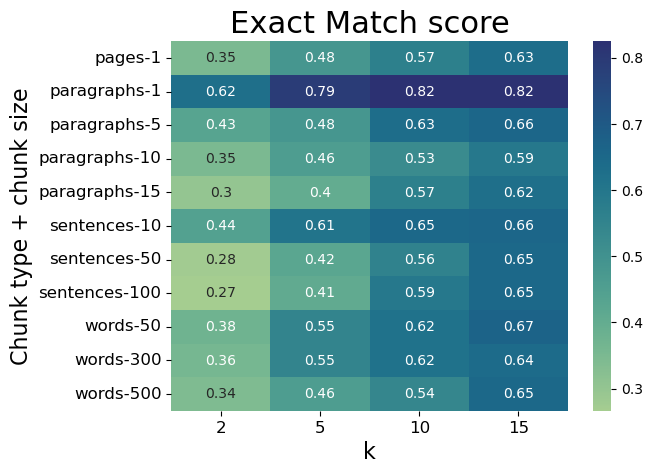

In [36]:
all_chunks_heatmap(df, "EM", title = "Exact Match score")

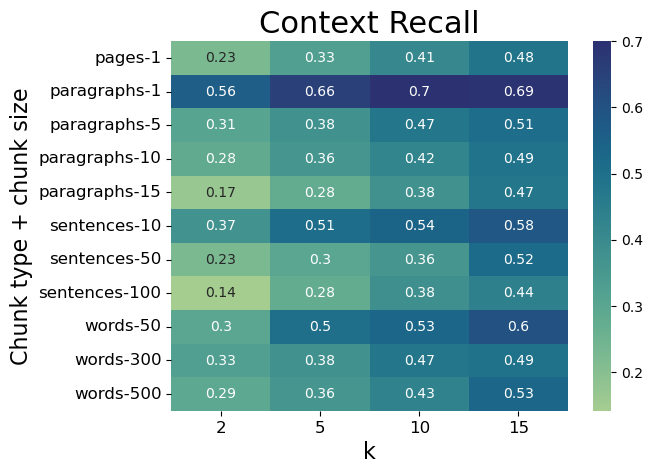

In [37]:
all_chunks_heatmap(df, "context_recall", title = "Context Recall")